<a href="https://colab.research.google.com/github/parthmore30/customer_segmentation/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load dataset (replace 'dataset.csv' with actual file path)
df=pd.read_csv("/content/shopping_trends.csv")
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


# New Section

In [ ]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


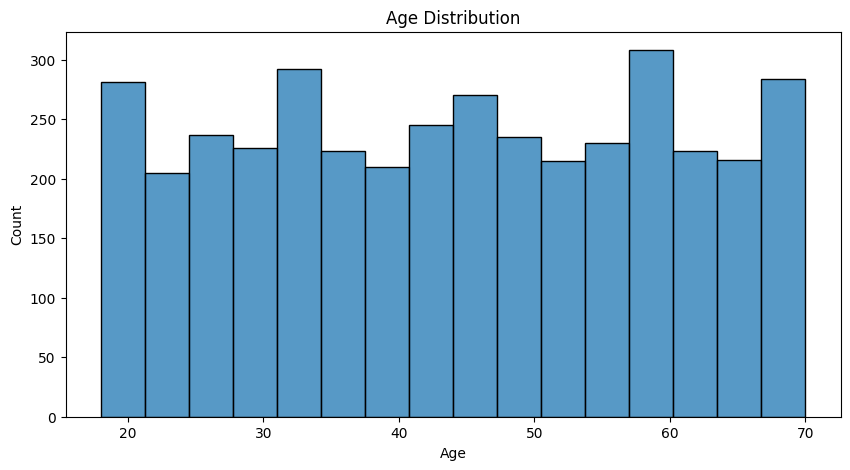

In [ ]:
# 1. Demographic Analysis
plt.figure(figsize=(10,5))
sns.histplot(df["Age"])
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

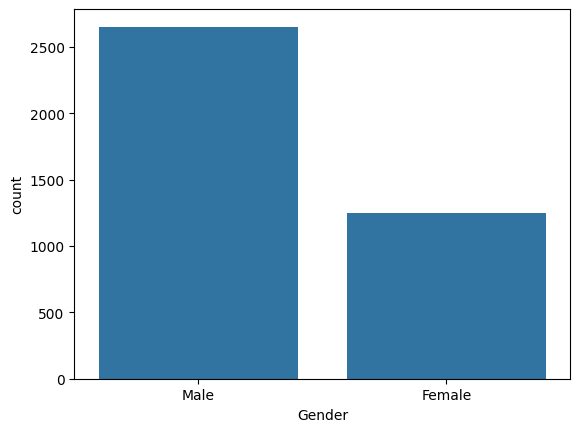

In [ ]:
df["Gender"].value_counts()
sns.countplot(x="Gender",data=df)

In [ ]:
# 2. Purchasing Patterns
df=df.rename(columns={"Item Purchased":"Products"})
popular_products= df["Products"].value_counts().head(10)
print("Top 10 Popular Products:")
print(popular_products)

Top 10 Popular Products:
Products
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64


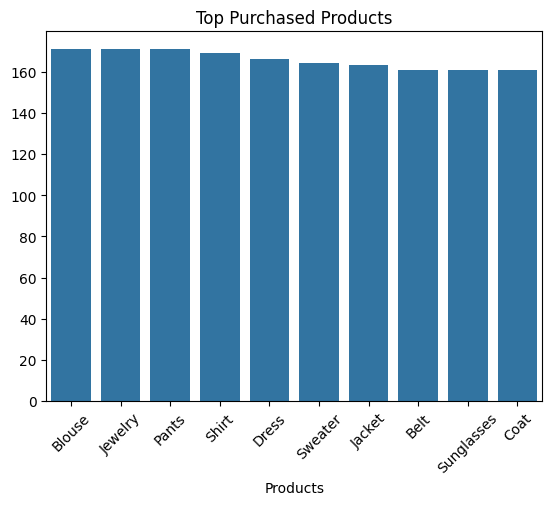

In [ ]:
sns.barplot(x=popular_products.index,y=popular_products.values)
plt.xticks(rotation=45)
plt.title('Top Purchased Products')
plt.show()

In [ ]:
# 3. Behavioral Insights
average_previous_purchases = df['Previous Purchases'].mean()
print(f'Average Previous Purchases: {average_previous_purchases:.2f}')


Average Previous Purchases: 25.35


In [ ]:
#The Average Previous Purchases of 25.35 indicates that, on average, customers have made around 25 purchases before the current one.

In [ ]:
# 4. Financial Impact
average_spending = df.groupby('Customer ID')['Purchase Amount (USD)'].sum()
print("Average Spending per Customer:")
print(average_spending.describe())


Average Spending per Customer:
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


In [ ]:
features = ['Age', 'Purchase Amount (USD)']
df_cluster = df[features].dropna()
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [ ]:
# 5. Loyalty Metrics
repeat_customers = df[df['Subscription Status'] == 'Yes']['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()
loyalty_rate = (repeat_customers / total_customers) * 100
print(f'Loyalty Rate: {loyalty_rate:.2f}%')


Loyalty Rate: 27.00%


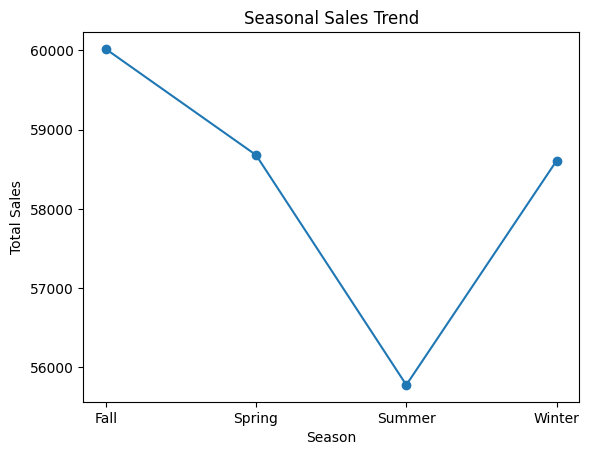

In [ ]:
# 6. Market Trends
monthly_sales = df.groupby('Season')['Purchase Amount (USD)'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Seasonal Sales Trend')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-18-1143d1f59feb>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


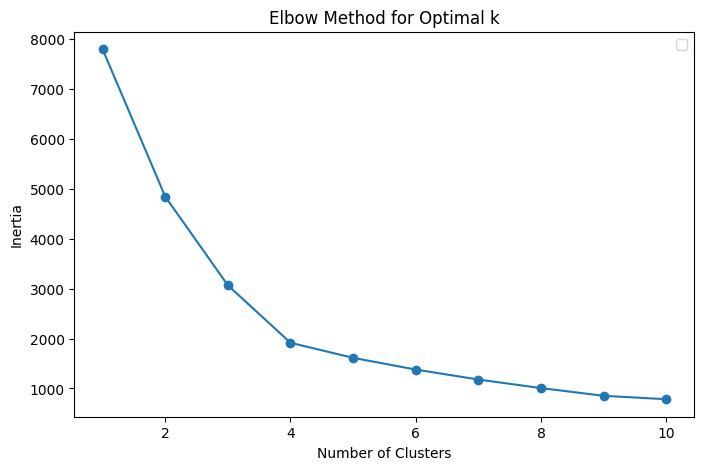

In [ ]:
# 6 Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()


In [ ]:
# Apply K-Means with optimal k (assumed 3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster_scaled)



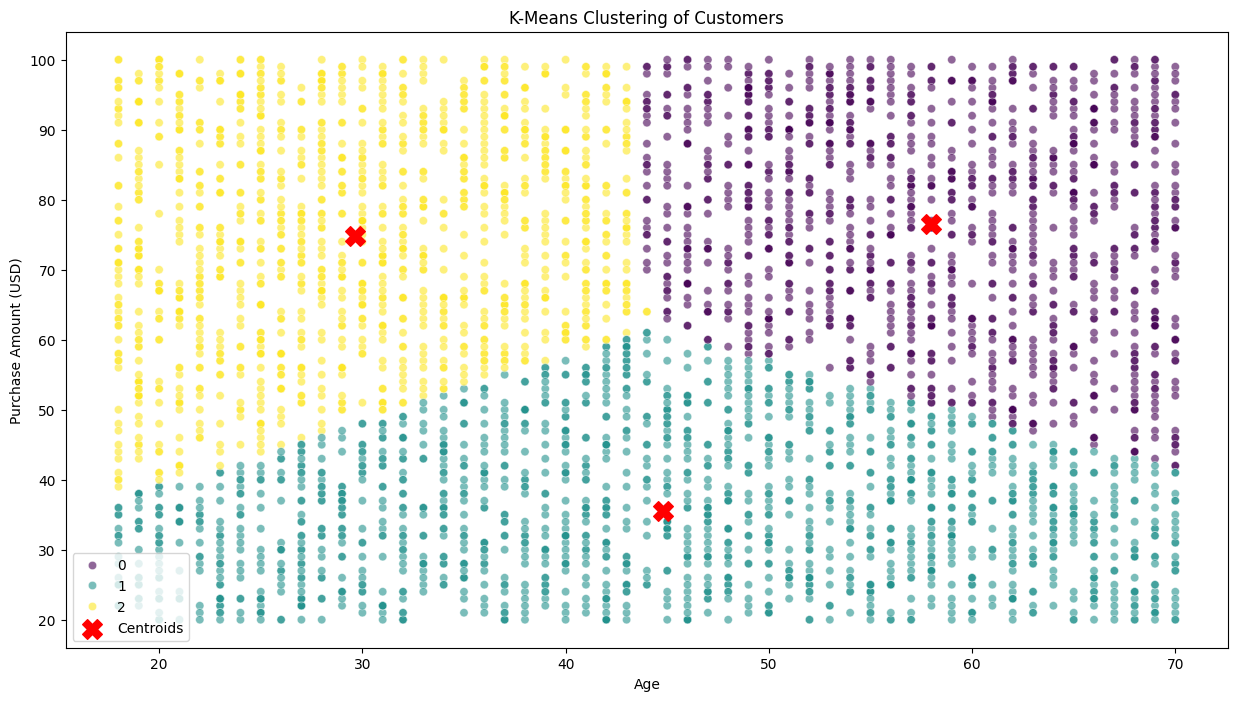

In [ ]:


# Get cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot with centroids
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.show()


In [ ]:
dataframe=pd.DataFrame(df)
dataframe

,Customer ID,Age,Gender,Products,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,1
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,1
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,0
